# Pulsar Stars - Project Proposal - Group 97

### Introduction

### Preliminary Exploratory Data Analysis

In [69]:
library(tidyverse)
library(repr)
library(tidymodels)

In [70]:
#reading data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
file <- download.file(url, "data/HTRU2.zip")

star_data <- read_csv(unzip("data/HTRU2.zip", "HTRU_2.csv"), 
            col_names = c("mean_of_int_profiles", "sd_of_int_profiles", "excess_kurtosis_of_int_profiles",
            "skewness_of_int_profiles", "mean_of_curve", "sd_of_curve", 
            "excess_kurtosis_of_curve", "skewness_of_curve", "true_pulsar")) |>
    mutate(true_pulsar = as_factor(true_pulsar))
slice(star_data, 1:10)
# below is a snapshot of the star data we will be working with

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_of_int_profiles, sd_of_int_profiles, excess_kurtosis_of_int_pr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_of_int_profiles,sd_of_int_profiles,excess_kurtosis_of_int_profiles,skewness_of_int_profiles,mean_of_curve,sd_of_curve,excess_kurtosis_of_curve,skewness_of_curve,true_pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.45268802,0.1703474,2.3319398,14.486853,9.001004,107.97251,0


In [71]:
#DO NOT REMOVE
set.seed(9999) 

#splitting data into training and testing
pulsar_split <- initial_split(star_data, prop = 0.75, strata = true_pulsar)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

In [72]:
#Summarizing data into table counting if its pulsar or not
pulsar_frequency <- pulsar_train |>
    group_by(true_pulsar) |>
    summarize(n = n())
pulsar_frequency

true_pulsar,n
<fct>,<int>
0,12207
1,1216


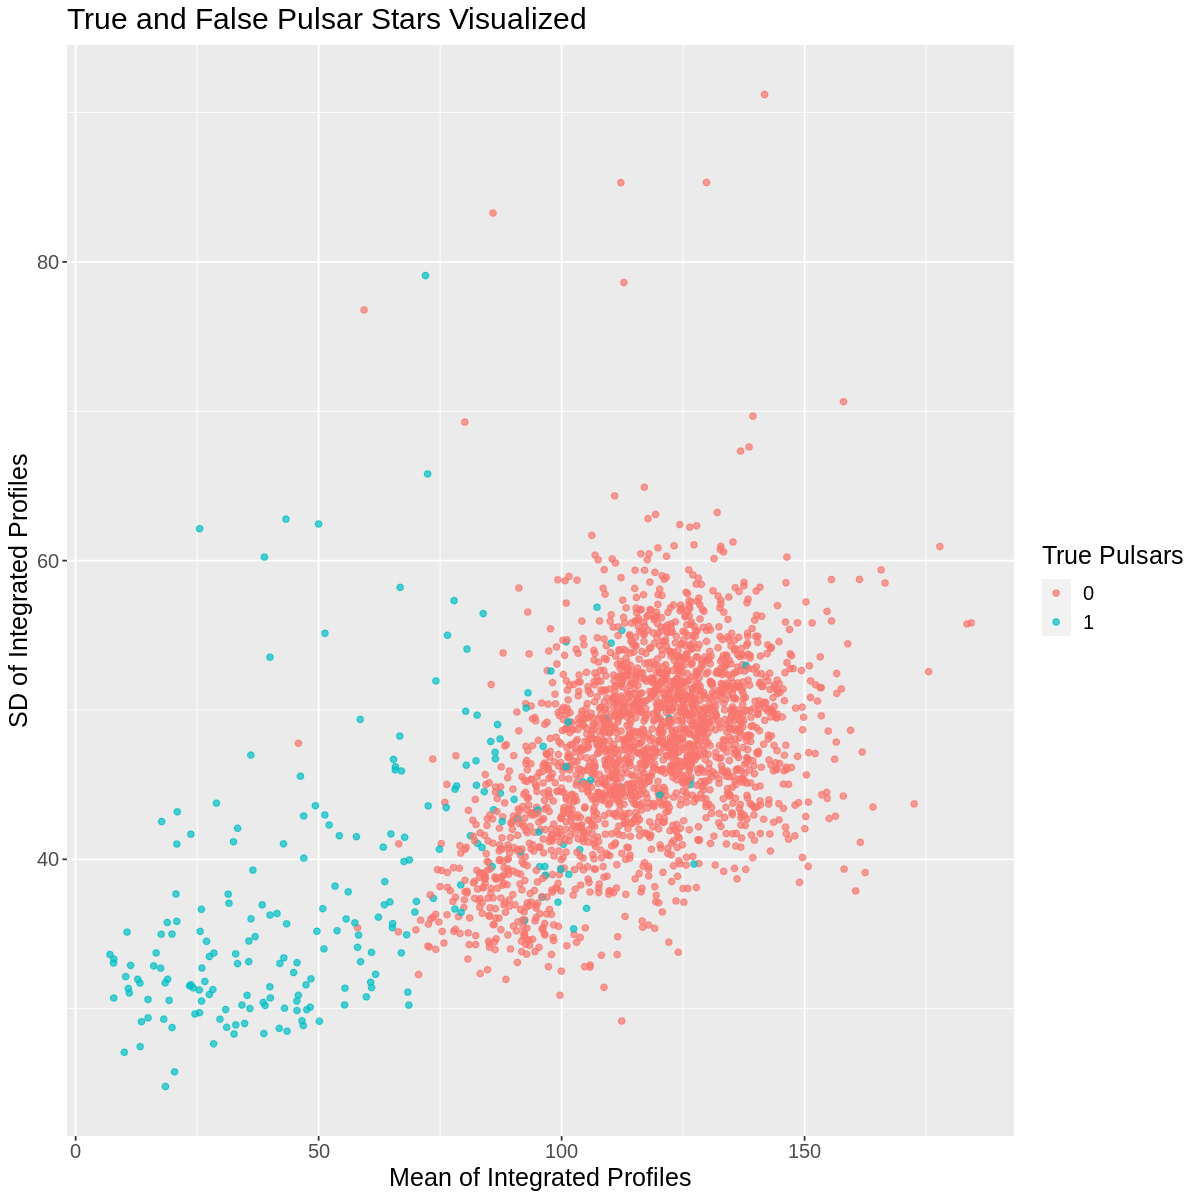

In [73]:
#DO NOT REMOVE
set.seed(9999) 
options(repr.plot.width = 10, repr.plot.height = 10)

#sampling from pulsar_train to reduce visual clutter
pulsar_sample <- sample_n(pulsar_train, 2500)

#Visualizing the mean and SD of integrated profile with colour to differentiate true pulsars
pulsar_plot <- pulsar_sample |>
    ggplot(aes(x = mean_of_int_profiles, y = sd_of_int_profiles)) +
            geom_point(aes(color = true_pulsar), alpha = 0.7) +
            labs(x = "Mean of Integrated Profiles", y = "SD of Integrated Profiles", color = "True Pulsars", title = "True and False Pulsar Stars Visualized") +
            theme(text = element_text(size = 15))
pulsar_plot

### Methods

### Expected Outcomes and Signifance